In [335]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [336]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
project_id = 'datamining-364220'

In [ ]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = jaswanth.karangula@sjsu.edu

Your active configuration is: [default]


In [ ]:
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [ ]:
!gcloud config set project 'datamining-364220'

Updated property [core/project].


In [ ]:
!gcloud config list project

[core]
project = datamining-364220

Your active configuration is: [default]


In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'datamining-364220'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

house_price


In [ ]:
query1 = """SELECT
  *
FROM
  `datamining-364220.house_price.data`

        """
dfquery = client.query(query1)

In [ ]:
df_house_price=dfquery.to_dataframe()
df_house_price.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-06-24 00:00:00+00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA
1,2014-06-12 00:00:00+00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
2,2014-05-06 00:00:00+00:00,360000.0,4.0,2.0,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,WA 98001,USA
3,2014-05-09 00:00:00+00:00,280000.0,4.0,2.0,2190,14439,1.0,0,0,4,1180,1010,1977,0,3331 S 368th Pl,Auburn,WA 98001,USA
4,2014-05-15 00:00:00+00:00,204700.0,4.0,2.0,1670,9987,1.0,0,0,3,1670,0,1967,2011,29031 40th Ave S,Auburn,WA 98001,USA
5,2014-05-21 00:00:00+00:00,250000.0,3.0,2.0,1170,7258,1.0,0,0,3,1170,0,1984,0,29812 55th Pl S,Auburn,WA 98001,USA
6,2014-05-28 00:00:00+00:00,225000.0,3.0,2.0,2030,24829,1.0,0,0,4,1220,810,1979,0,36721 34th Ave S,Auburn,WA 98001,USA
7,2014-05-30 00:00:00+00:00,196440.0,3.0,2.0,1560,7352,1.0,0,0,3,1560,0,1992,0,130 Main St,Algona,WA 98001,USA
8,2014-06-17 00:00:00+00:00,272000.0,3.0,2.0,1380,7476,1.0,0,0,3,1380,0,1989,0,5002 S 299th Pl,Auburn,WA 98001,USA
9,2014-06-26 00:00:00+00:00,254000.0,5.0,2.0,2080,16117,1.0,0,0,5,1740,340,1959,0,28830 34th Ave S,Auburn,WA 98001,USA


In [ ]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           4600 non-null   datetime64[ns, UTC]
 1   price          4600 non-null   float64            
 2   bedrooms       4600 non-null   float64            
 3   bathrooms      4600 non-null   float64            
 4   sqft_living    4600 non-null   int64              
 5   sqft_lot       4600 non-null   int64              
 6   floors         4600 non-null   float64            
 7   waterfront     4600 non-null   int64              
 8   view           4600 non-null   int64              
 9   condition      4600 non-null   int64              
 10  sqft_above     4600 non-null   int64              
 11  sqft_basement  4600 non-null   int64              
 12  yr_built       4600 non-null   int64              
 13  yr_renovated   4600 non-null   int64            

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [ ]:
query2 = """SELECT
  `city`,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data`

  Group By `city`

LIMIT 200
        """
dfquery = client.query(query2)

In [ ]:
df_house_price_by_city  = dfquery.to_dataframe()
df_house_price_by_city.head(10)

,city,Min_Price,Max_Price,AVG_Price
0,Redmond,170000.0,2280000.0,6.676495e+05
1,Seattle,0.0,12899000.0,5.798375e+05
2,Auburn,0.0,900000.0,2.993404e+05
3,Algona,100000.0,262000.0,2.072880e+05
4,Federal Way,0.0,819000.0,2.898877e+05
5,Bellevue,0.0,7062500.0,8.471807e+05
6,Clyde Hill,0.0,3800000.0,1.321945e+06
7,Yarrow Point,84350.0,1901000.0,1.194838e+06
8,Bothell,347000.0,749995.0,4.814419e+05
9,Carnation,80000.0,1680000.0,5.087520e+05


In [ ]:
query3 = """SELECT
  `city`,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data`

  Group By `city`

  Order by avg(`price`) desc
        """
dfquery = client.query(query3)

In [ ]:
df_house_price_by_city_ordered  = dfquery.to_dataframe()
df_house_price_by_city_ordered.head(10)

,city,Min_Price,Max_Price,AVG_Price
0,Medina,188000.0,3710000.0,2.046559e+06
1,Clyde Hill,0.0,3800000.0,1.321945e+06
2,Yarrow Point,84350.0,1901000.0,1.194838e+06
3,Mercer Island,0.0,4668000.0,1.123818e+06
4,Bellevue,0.0,7062500.0,8.471807e+05
5,Beaux Arts Village,745000.0,745000.0,7.450000e+05
6,Fall City,275000.0,1600000.0,6.926818e+05
7,Sammamish,0.0,2400000.0,6.869176e+05
8,Redmond,170000.0,2280000.0,6.676495e+05
9,Newcastle,339900.0,1200000.0,6.660467e+05


In [ ]:
query4 = """SELECT
  EXTRACT(YEAR from `date`) as Year ,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data`

  Group By  EXTRACT(YEAR from `date`)
        """
dfquery = client.query(query4)

In [ ]:
df_house_price_by_year = dfquery.to_dataframe()
df_house_price_by_year.head(10)

,Year,Min_Price,Max_Price,AVG_Price
0,2014,0.0,26590000.0,551962.988473


In [ ]:
query5 = """SELECT
  EXTRACT(MONTH from `date`) as Month ,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data`

  Group By  EXTRACT(MONTH from `date`)
        """
dfquery = client.query(query5)

In [ ]:
df_house_price_by_month = dfquery.to_dataframe()
df_house_price_by_month.head(10)

,Month,Min_Price,Max_Price,AVG_Price
0,6,0.0,12899000.0,547968.179909
1,5,0.0,3710000.0,533822.837768
2,7,0.0,26590000.0,614407.818959


In [ ]:
df_house_price=dfquery.to_dataframe()
df_house_price.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-06-24 00:00:00+00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA
1,2014-06-12 00:00:00+00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
2,2014-05-06 00:00:00+00:00,360000.0,4.0,2.0,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,WA 98001,USA
3,2014-05-09 00:00:00+00:00,280000.0,4.0,2.0,2190,14439,1.0,0,0,4,1180,1010,1977,0,3331 S 368th Pl,Auburn,WA 98001,USA
4,2014-05-15 00:00:00+00:00,204700.0,4.0,2.0,1670,9987,1.0,0,0,3,1670,0,1967,2011,29031 40th Ave S,Auburn,WA 98001,USA
5,2014-05-21 00:00:00+00:00,250000.0,3.0,2.0,1170,7258,1.0,0,0,3,1170,0,1984,0,29812 55th Pl S,Auburn,WA 98001,USA
6,2014-05-28 00:00:00+00:00,225000.0,3.0,2.0,2030,24829,1.0,0,0,4,1220,810,1979,0,36721 34th Ave S,Auburn,WA 98001,USA
7,2014-05-30 00:00:00+00:00,196440.0,3.0,2.0,1560,7352,1.0,0,0,3,1560,0,1992,0,130 Main St,Algona,WA 98001,USA
8,2014-06-17 00:00:00+00:00,272000.0,3.0,2.0,1380,7476,1.0,0,0,3,1380,0,1989,0,5002 S 299th Pl,Auburn,WA 98001,USA
9,2014-06-26 00:00:00+00:00,254000.0,5.0,2.0,2080,16117,1.0,0,0,5,1740,340,1959,0,28830 34th Ave S,Auburn,WA 98001,USA


In [ ]:
query6 = """SELECT
  `bedrooms` as Number_Of_Bedrooms, `bathrooms` as Number_Of_Bathrooms,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data` where `bedrooms`>0 and `bathrooms`>0

  Group By `bedrooms`,`bathrooms`
        """
dfquery = client.query(query6)

In [ ]:
df_house_price_by_bb = dfquery.to_dataframe()
df_house_price_by_bb.head(10)

,Number_Of_Bedrooms,Number_Of_Bathrooms,Min_Price,Max_Price,AVG_Price
0,4.0,2.00,0.0,1275000.0,474108.791917
1,3.0,2.00,83300.0,26590000.0,568804.897548
2,5.0,2.00,0.0,930000.0,487330.000000
3,1.0,2.00,115000.0,115000.0,115000.000000
4,6.0,2.00,260000.0,755000.0,460000.000000
5,2.0,2.00,186950.0,1087500.0,480809.756098
6,3.0,2.25,180000.0,2400000.0,500853.084803
7,4.0,2.25,0.0,1738000.0,578253.819112
8,5.0,2.25,0.0,1895000.0,630311.120000
9,2.0,2.25,0.0,1695000.0,534154.166667


In [ ]:
query6 = """SELECT
  CONCAT(`bedrooms`," bed- ",`bathrooms`," bath") as BB ,min(`price`) as Min_Price,max(`price`) Max_Price,avg(`price`) as AVG_Price
FROM
  `datamining-364220.house_price.data` where `bedrooms`>0 and `bathrooms`>0 and `price`>0

  Group By CONCAT(`bedrooms`," bed- ",`bathrooms`," bath")
        """
dfquery = client.query(query6)

In [ ]:
df_house_price_by_bb = dfquery.to_dataframe()
df_house_price_by_bb.head(20)

,BB,Min_Price,Max_Price,AVG_Price
0,4 bed- 2 bath,84350.0,1275000.0,478126.663035
1,3 bed- 2 bath,83300.0,26590000.0,568804.897548
2,5 bed- 2 bath,190000.0,930000.0,507635.416667
3,1 bed- 2 bath,115000.0,115000.0,115000.000000
4,6 bed- 2 bath,260000.0,755000.0,460000.000000
5,2 bed- 2 bath,186950.0,1087500.0,480809.756098
6,3 bed- 2.25 bath,180000.0,2400000.0,500853.084803
7,4 bed- 2.25 bath,132250.0,1738000.0,586121.218011
8,5 bed- 2.25 bath,255000.0,1895000.0,685120.782609
9,2 bed- 2.25 bath,215000.0,1695000.0,582713.636364


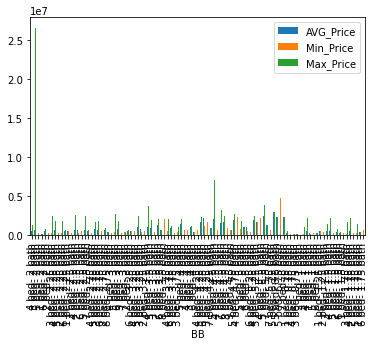

In [ ]:
df_house_price_by_bb.plot(kind='bar', x='BB', y=['AVG_Price','Min_Price','Max_Price'])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
query1 = """SELECT
  *
FROM
  `datamining-364220.house_price.data`
where `bedrooms`>0 and `bathrooms`>0 and `price`>0
        """
dfquery = client.query(query1)

In [ ]:
df_house_price_data=dfquery.to_dataframe()
df_house_price_data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-06 00:00:00+00:00,360000.0,4.0,2.0,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,WA 98001,USA
1,2014-05-09 00:00:00+00:00,280000.0,4.0,2.0,2190,14439,1.0,0,0,4,1180,1010,1977,0,3331 S 368th Pl,Auburn,WA 98001,USA
2,2014-05-15 00:00:00+00:00,204700.0,4.0,2.0,1670,9987,1.0,0,0,3,1670,0,1967,2011,29031 40th Ave S,Auburn,WA 98001,USA
3,2014-05-21 00:00:00+00:00,250000.0,3.0,2.0,1170,7258,1.0,0,0,3,1170,0,1984,0,29812 55th Pl S,Auburn,WA 98001,USA
4,2014-05-28 00:00:00+00:00,225000.0,3.0,2.0,2030,24829,1.0,0,0,4,1220,810,1979,0,36721 34th Ave S,Auburn,WA 98001,USA
5,2014-05-30 00:00:00+00:00,196440.0,3.0,2.0,1560,7352,1.0,0,0,3,1560,0,1992,0,130 Main St,Algona,WA 98001,USA
6,2014-06-17 00:00:00+00:00,272000.0,3.0,2.0,1380,7476,1.0,0,0,3,1380,0,1989,0,5002 S 299th Pl,Auburn,WA 98001,USA
7,2014-06-26 00:00:00+00:00,254000.0,5.0,2.0,2080,16117,1.0,0,0,5,1740,340,1959,0,28830 34th Ave S,Auburn,WA 98001,USA
8,2014-06-30 00:00:00+00:00,263400.0,4.0,2.0,1360,60548,1.0,0,0,3,960,400,1960,2012,36656 55th Pl S,Auburn,WA 98001,USA
9,2014-07-01 00:00:00+00:00,241000.0,3.0,2.0,1770,7000,1.0,0,0,3,1770,0,1986,0,30027 58th Pl S,Auburn,WA 98001,USA


In [ ]:
df_house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           4549 non-null   datetime64[ns, UTC]
 1   price          4549 non-null   float64            
 2   bedrooms       4549 non-null   float64            
 3   bathrooms      4549 non-null   float64            
 4   sqft_living    4549 non-null   int64              
 5   sqft_lot       4549 non-null   int64              
 6   floors         4549 non-null   float64            
 7   waterfront     4549 non-null   int64              
 8   view           4549 non-null   int64              
 9   condition      4549 non-null   int64              
 10  sqft_above     4549 non-null   int64              
 11  sqft_basement  4549 non-null   int64              
 12  yr_built       4549 non-null   int64              
 13  yr_renovated   4549 non-null   int64            

In [ ]:
prices = df_house_price_data['price']
prices

0       360000.0
1       280000.0
2       204700.0
3       250000.0
4       225000.0
          ...   
4544    972000.0
4545    616000.0
4546    584000.0
4547    320000.0
4548    250000.0
Name: price, Length: 4549, dtype: float64

In [338]:
from google.colab import files


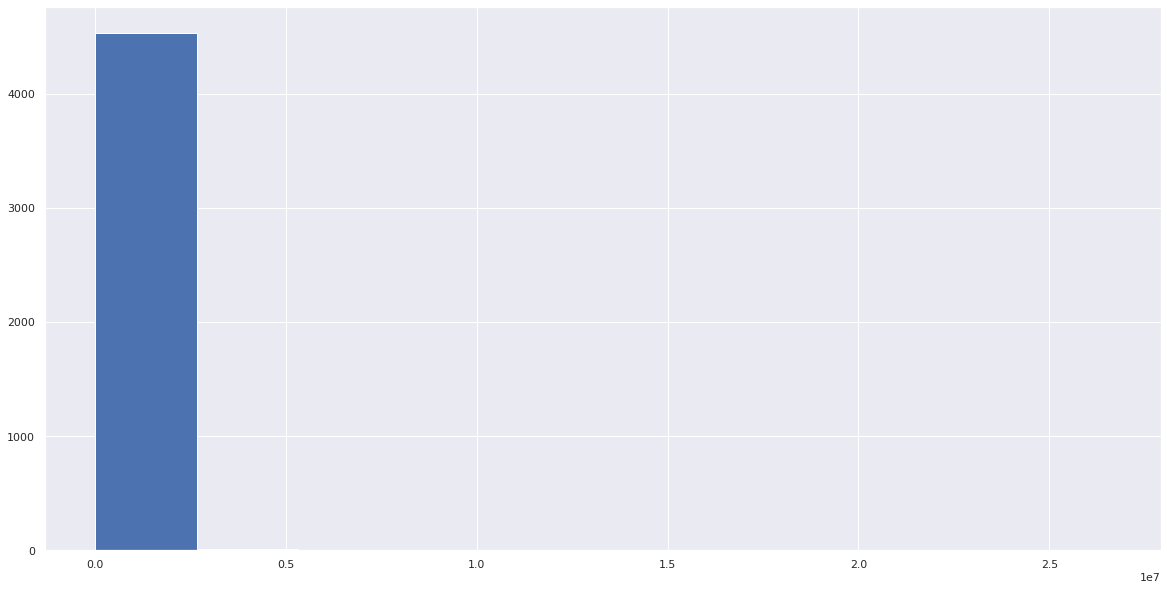

In [ ]:
ax = plt.hist(prices);

In [ ]:
min(prices), max(prices)

(7800.0, 26590000.0)

In [ ]:
price_bins = range(1000, 10000000, 100000)

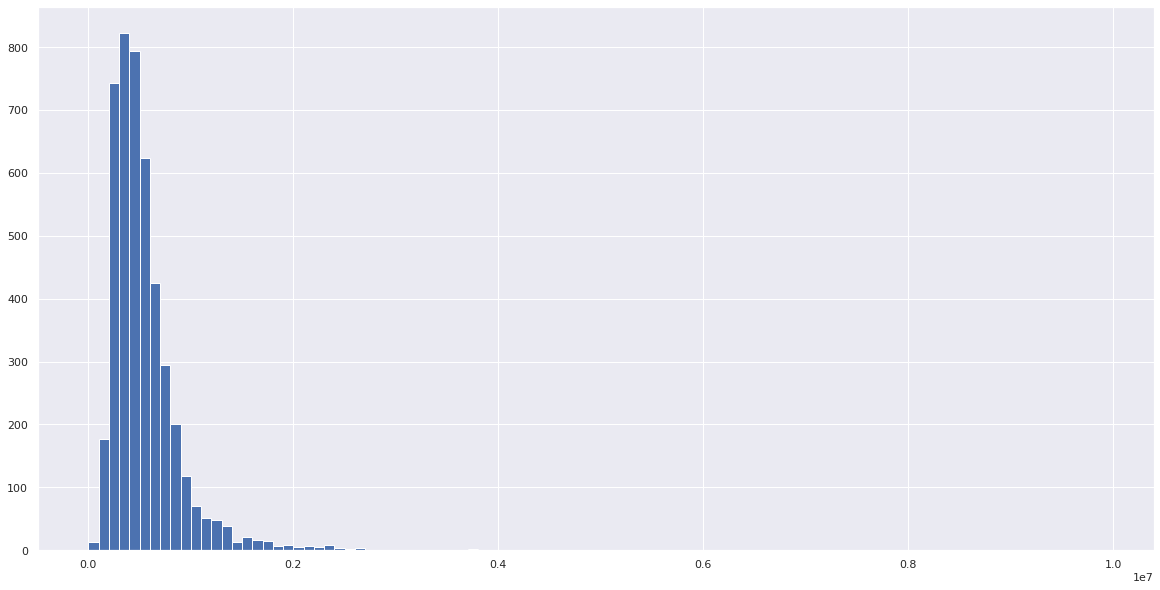

In [ ]:
plt.hist(prices, bins=price_bins, ec='w');

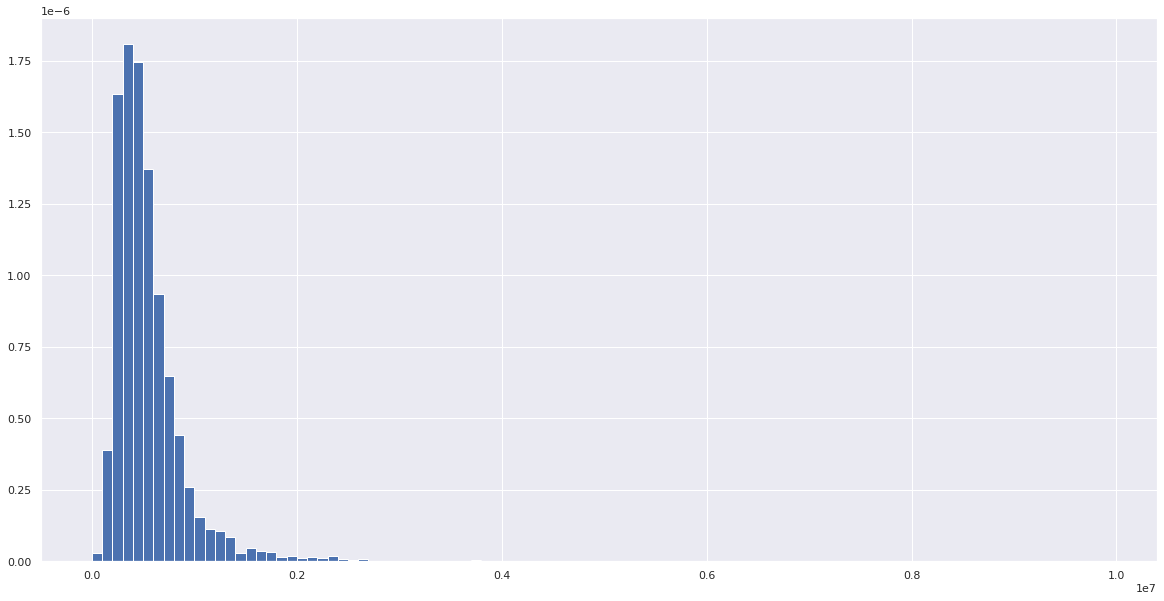

In [ ]:
plt.hist(prices, density = True, bins=price_bins, ec='w');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

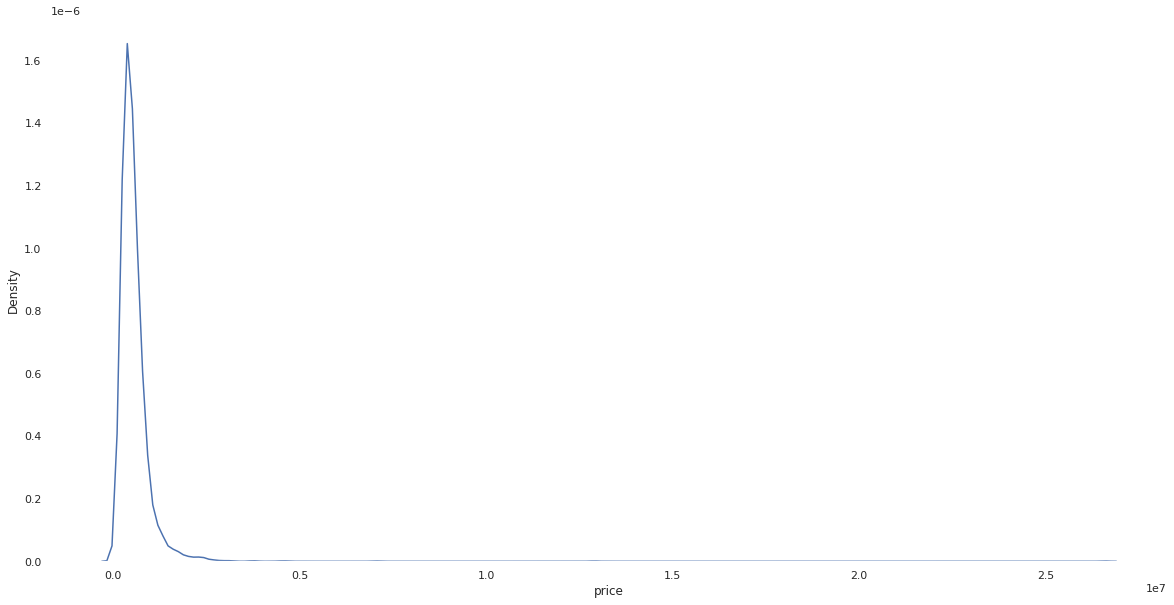

In [339]:
sns_plot = sns.kdeplot(prices)
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

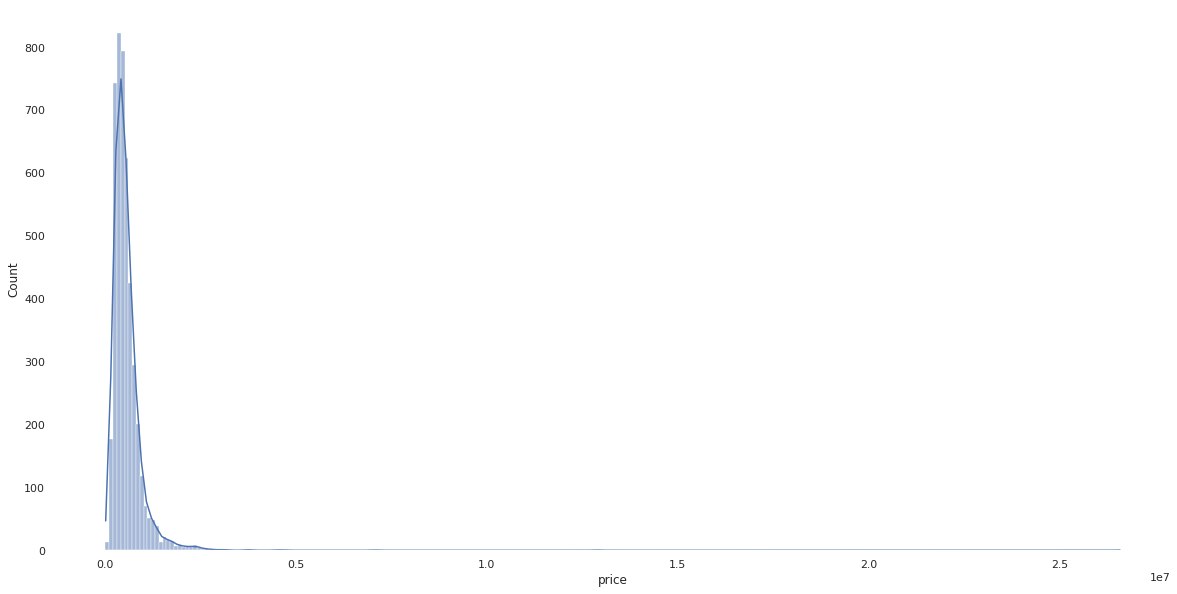

In [344]:
sns_plot = sns.histplot(prices,bins = price_bins, kde=True);
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

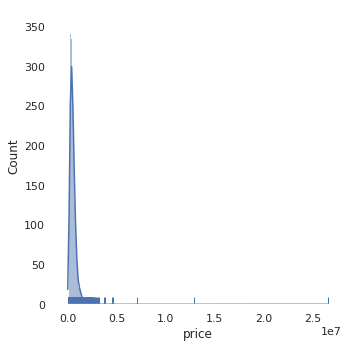

In [345]:
sns_plot = sns.displot(prices, kde=True,  rug=True);
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

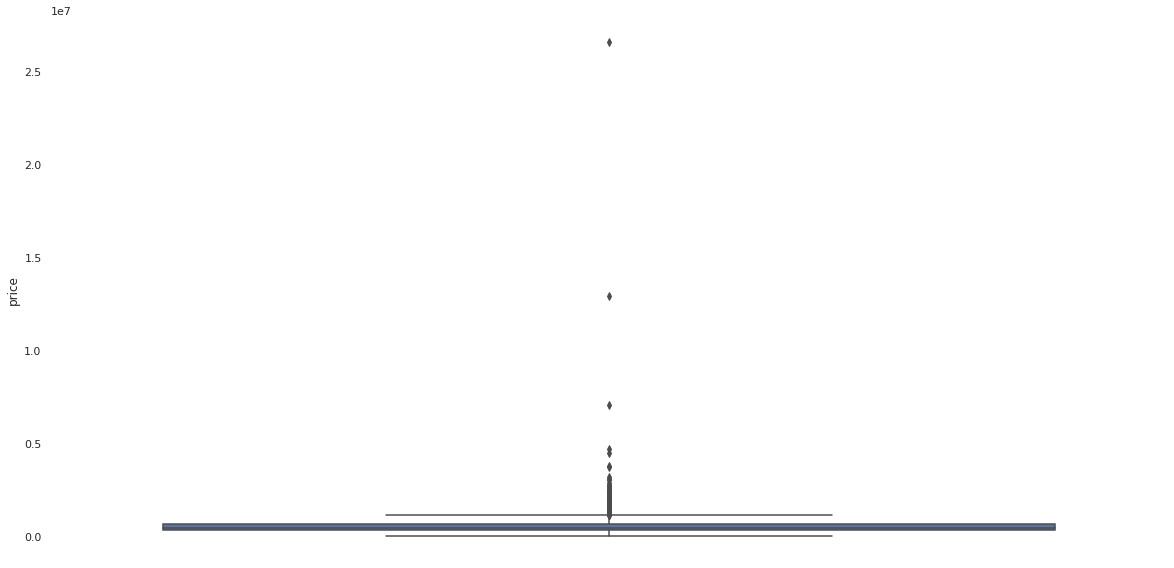

In [346]:
#box plot
plt.figure(figsize = (20, 10))
sns_plot = sns.boxplot(y=prices);
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

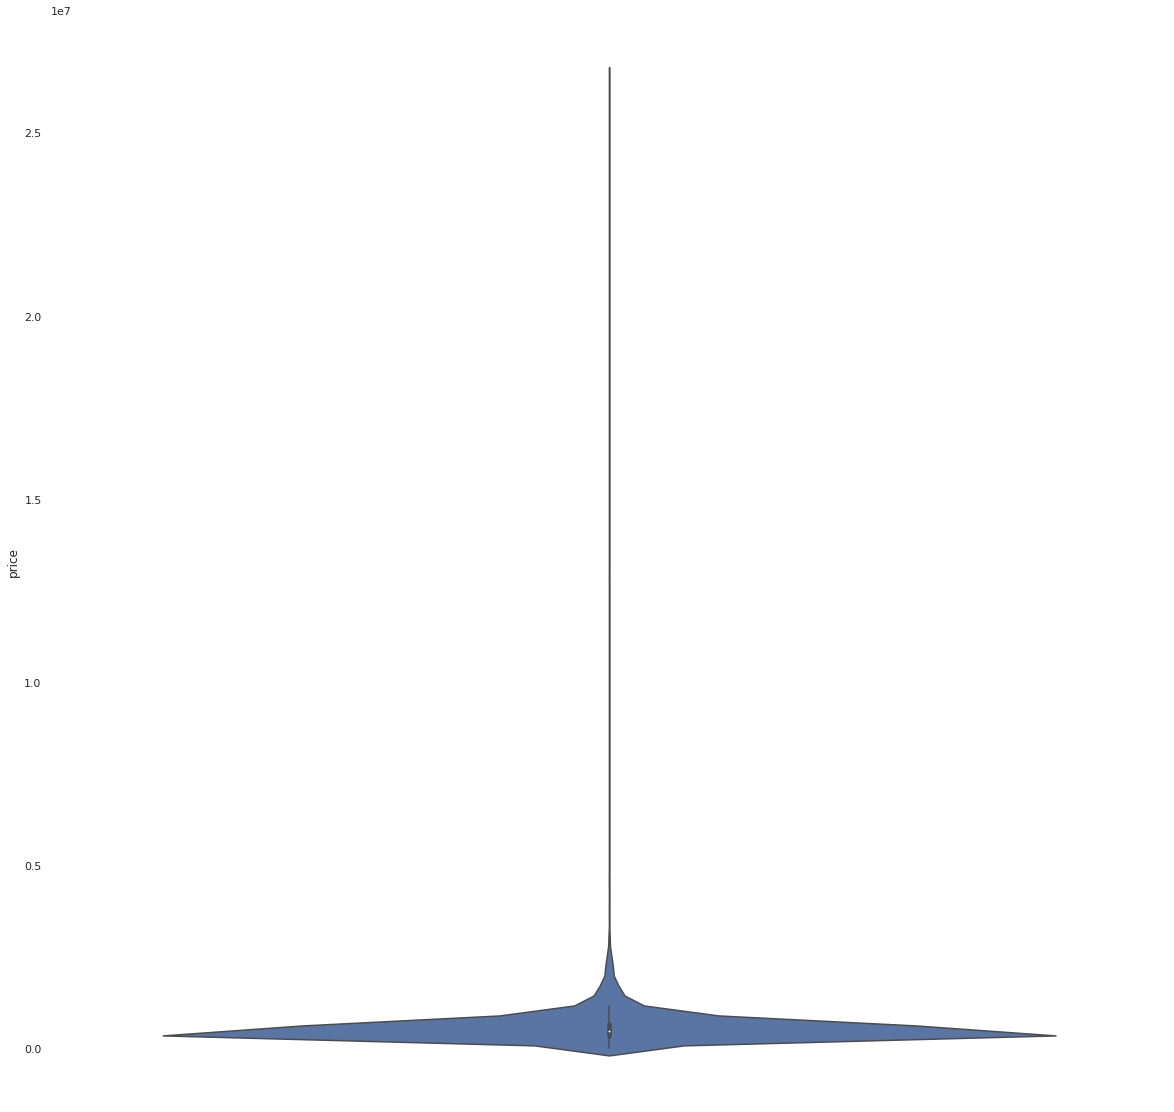

In [347]:
plt.figure(figsize = (20, 20))
sns_plot = sns.violinplot(y=prices);
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

In [348]:
df_house_price_data.agg({
    "price":["min", "max", "median", "skew"]
})

,price
min,7.800000e+03
max,2.659000e+07
median,4.650000e+05
skew,2.504075e+01


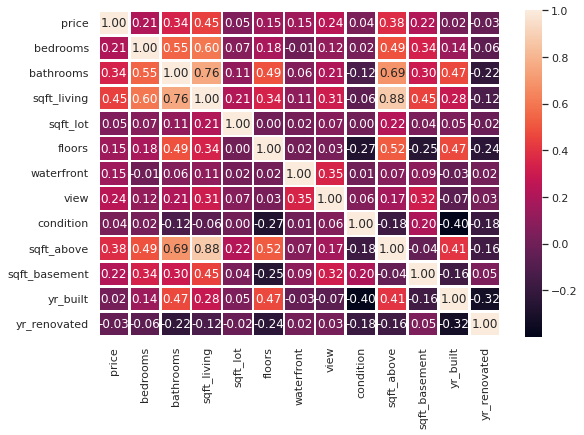

In [ ]:
corr = df_house_price_data.corr(method ='pearson') 

f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot=True,linewidths=1.5,fmt='.2f',ax=ax)
plt.show()


In [350]:

numericalColumns = []
for col in df_house_price_data.columns:
  if df_house_price_data[col].dtype in [float,int]:
        numericalColumns.append(col)

numericalColumns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

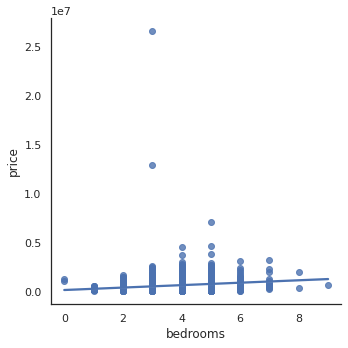

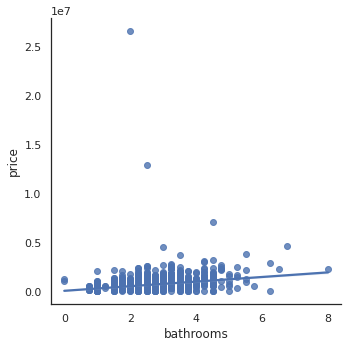

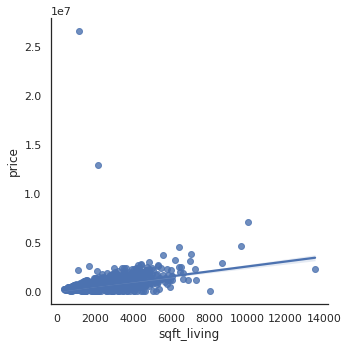

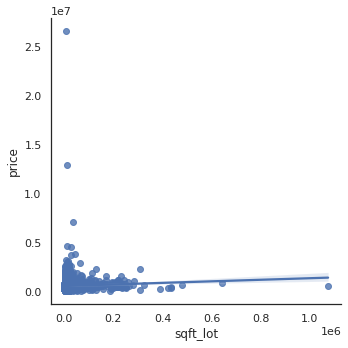

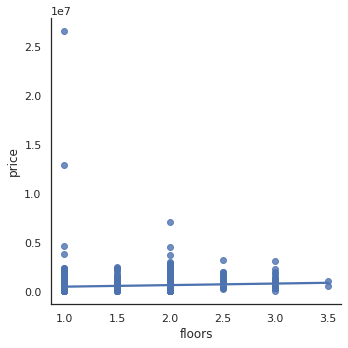

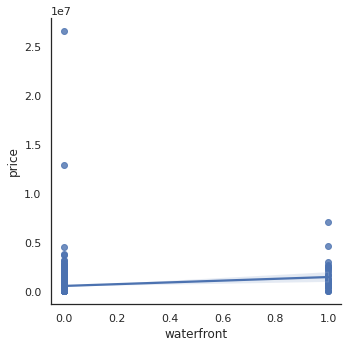

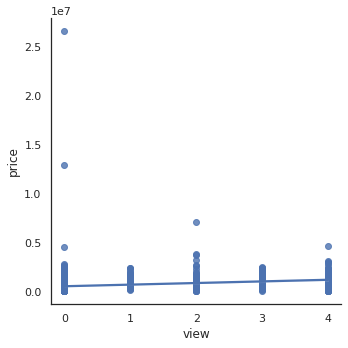

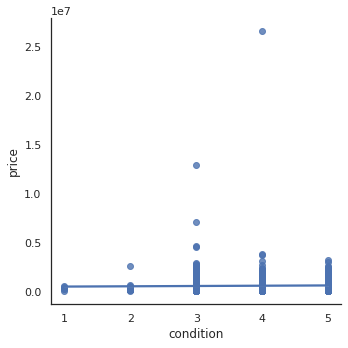

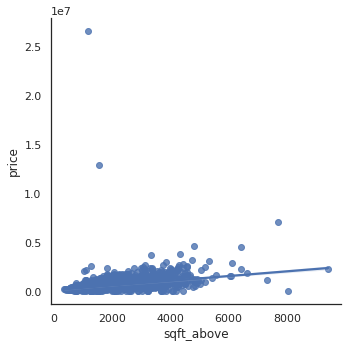

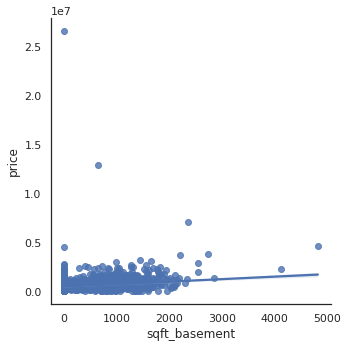

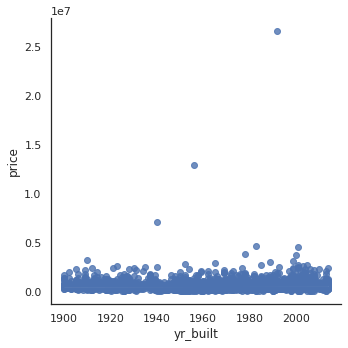

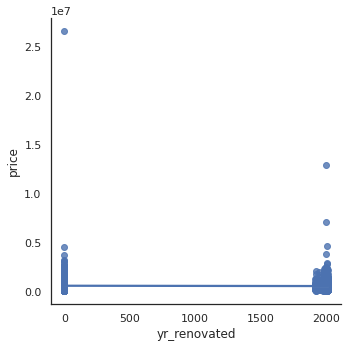

In [351]:
numericalColumns.remove('price')
sns.set(style="white", color_codes=True)
for column in numericalColumns:
    sns_plot = sns.lmplot(x = column, y ='price', data = df_house_price)
    sns_plot.figure.savefig("output.pdf")
    files.download("output.pdf") 

In [352]:
query10 = """SELECT
   `city` , count(`city`) as count
FROM
  `datamining-364220.house_price.data`
where `bedrooms`>0 and `bathrooms`>0 and `price`>0
      Group by `city`  """
dfquery = client.query(query10)

In [353]:
unique_cities_df =dfquery.to_dataframe()
unique_cities_df.head(10)

,city,count
0,Auburn,175
1,Algona,5
2,Federal Way,145
3,Bellevue,281
4,Clyde Hill,9
5,Yarrow Point,4
6,Bothell,33
7,Carnation,22
8,Duvall,42
9,Enumclaw,27


In [354]:
city_counts=df_house_price_data['city'].value_counts()
city_counts.to_numpy()

array([1560,  291,  281,  234,  187,  186,  184,  175,  171,  145,  123,
        114,   95,   82,   72,   69,   65,   58,   50,   42,   42,   34,
         33,   33,   29,   29,   28,   27,   22,   17,   11,   11,    9,
          8,    7,    6,    5,    4,    3,    2,    2,    1,    1,    1])

In [357]:
# we can remove entries with less tha 10 records per state
# unique_cities = []
# for city,count in df_house_price_data['city'],city_counts:
#   if count>0:
#     unique_cities.append(city)


In [358]:
unique_cities=['Seattle','Renton','Bellevue','Bellevue','Redmond','Kirkland','Issaquah','Kent','Auburn','Sammamish','Federal Way','Shoreline','Woodinville']

In [359]:
filtered_house_price_df = df_house_price[df_house_price.city.isin(unique_cities)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

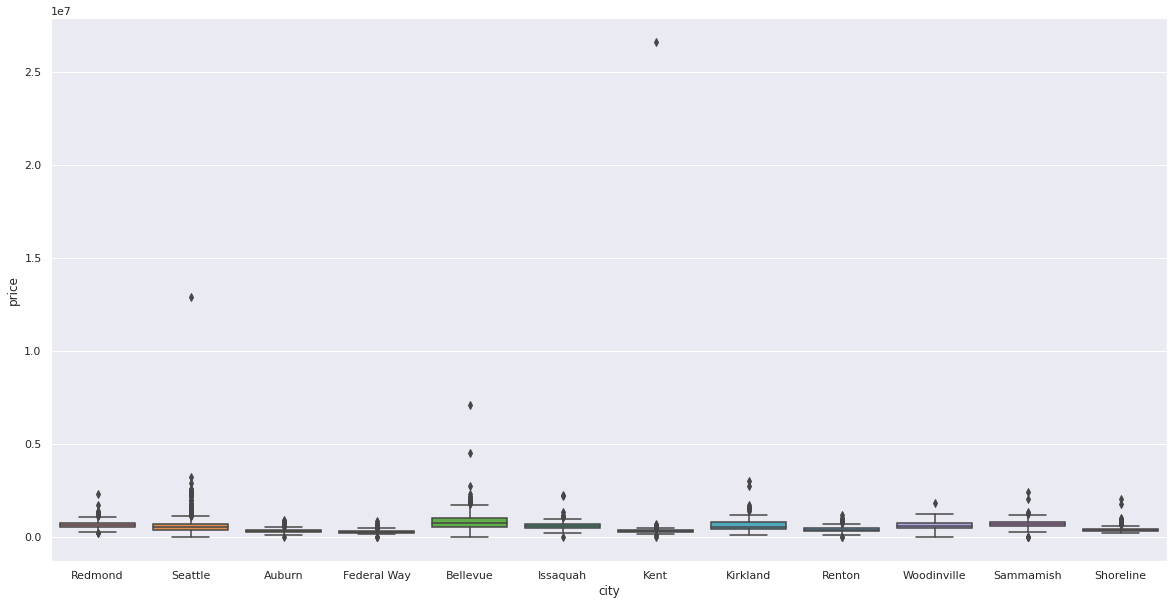

In [360]:
sns.set(rc={'figure.figsize':(20,10)})
sns_plot = sns.boxplot(x="city", y="price", data=filtered_house_price_df)
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

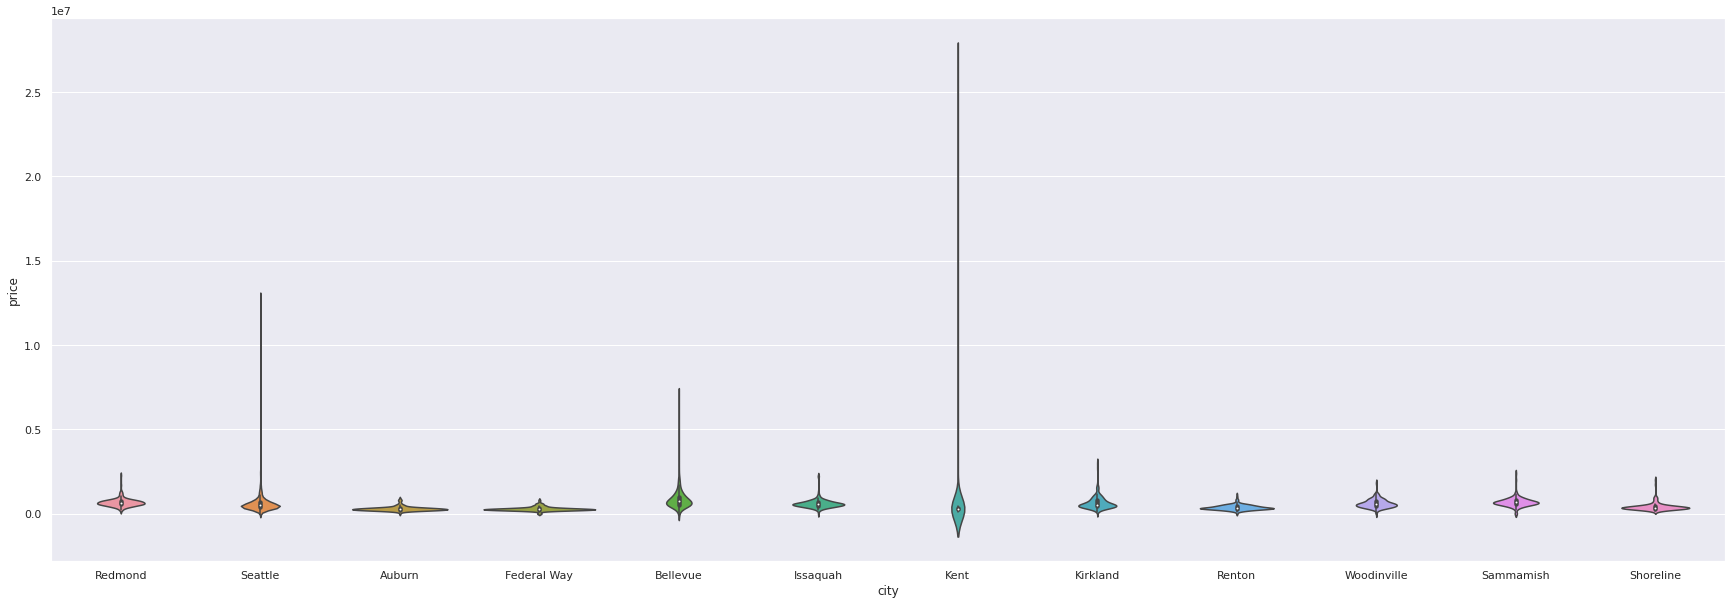

In [361]:
sns.set(rc={'figure.figsize':(30,10)})
sns_plot = sns.violinplot(x="city", y="price", data=filtered_house_price_df)
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

In [362]:
price_bins = range(1000, 10000000, 100000)

In [363]:
redmond_prices = df_house_price[df_house_price['city']=='Redmond']['price']
seattle_prices = df_house_price[df_house_price['city']=='Seattle']['price']
bellevue_prices = df_house_price[df_house_price['city']=='Bellevue']['price']
kent_prices = df_house_price[df_house_price['city']=='Kent']['price']
auburn_prices = df_house_price[df_house_price['city']=='Auburn']['price']
kirkland_prices = df_house_price[df_house_price['city']=='Kirkland']['price']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

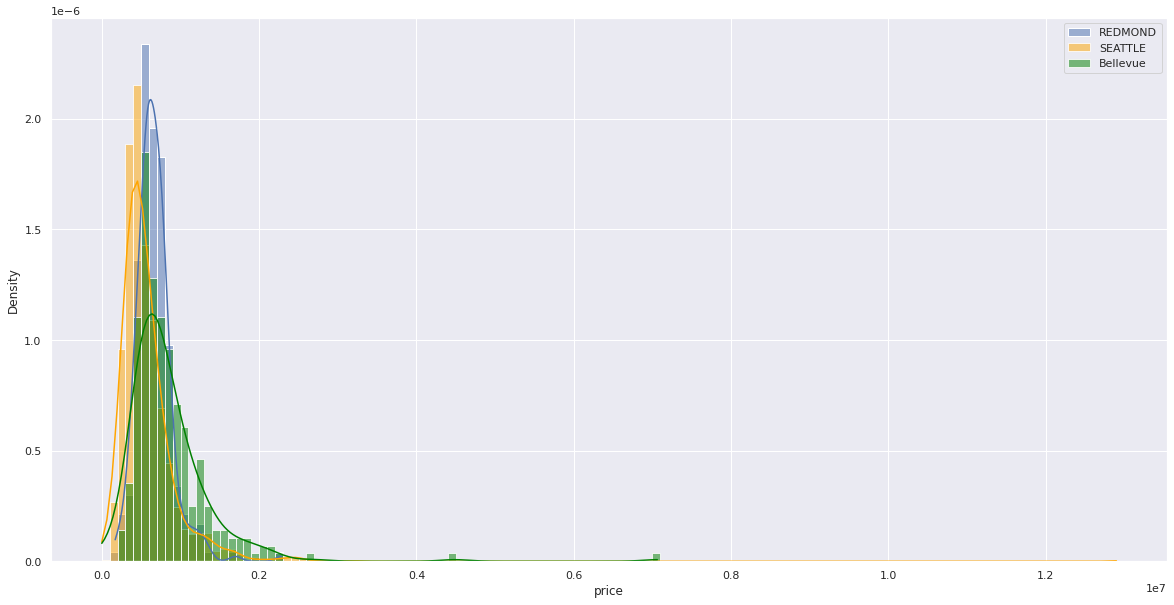

In [364]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(redmond_prices,  kde=True, bins = price_bins, stat='density', label='REDMOND', ec='w');
sns.histplot(seattle_prices, kde=True, bins = price_bins, stat='density', label='SEATTLE', color='orange', ec='w');
sns_plot = sns.histplot(bellevue_prices, kde=True, bins = price_bins, stat='density', label='Bellevue', color='green', ec='w');
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 
plt.legend();

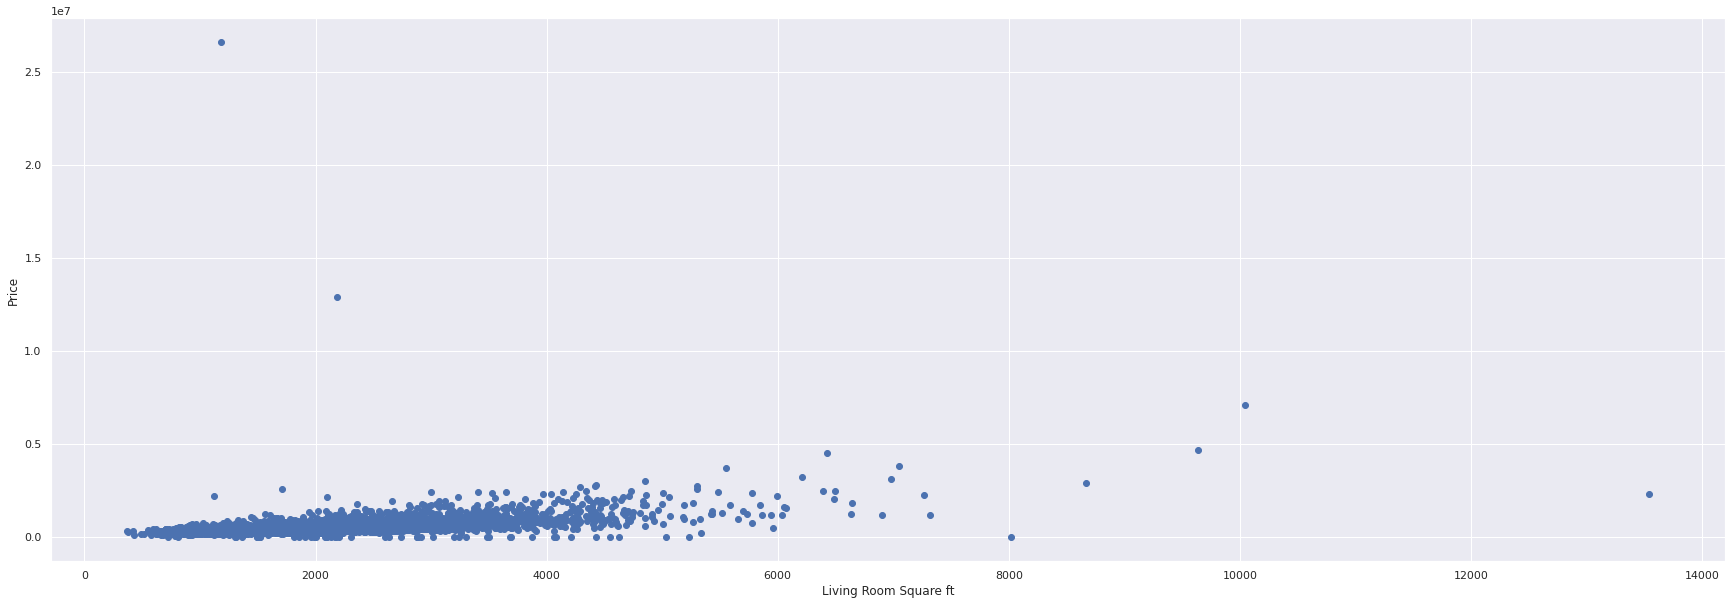

In [ ]:
plt.scatter(df_house_price['sqft_living'], df_house_price['price']);
plt.xlabel('Living Room Square ft')
plt.ylabel('Price');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

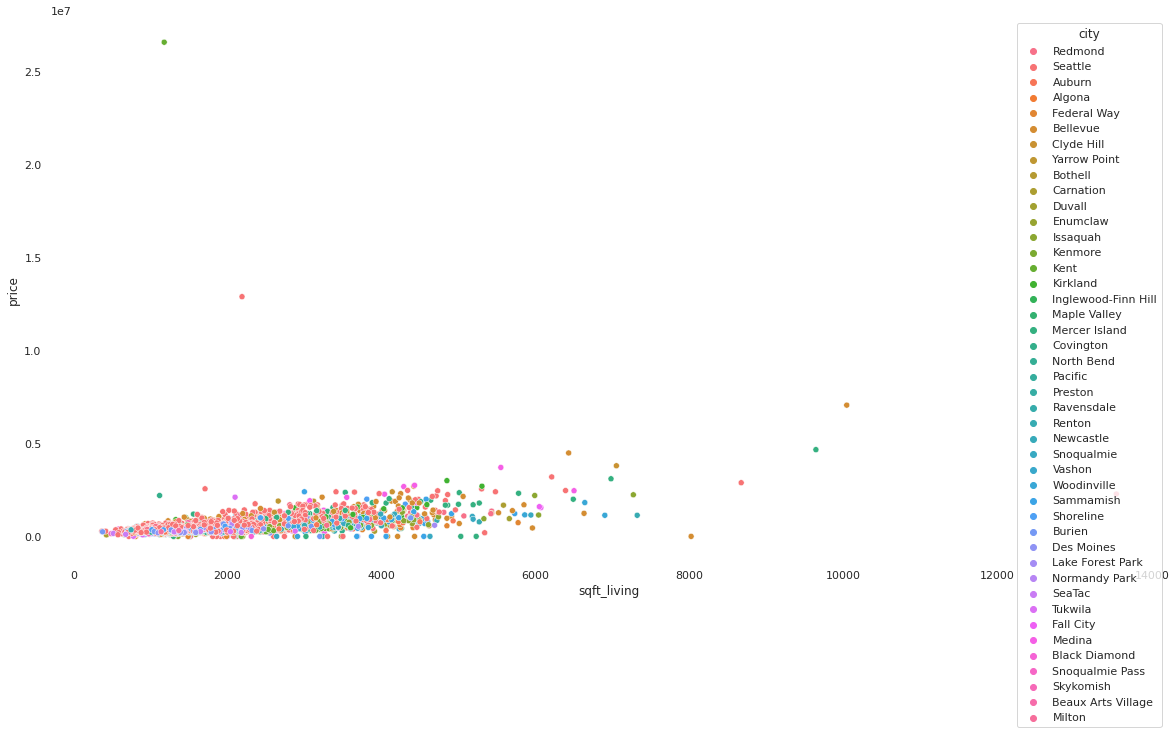

In [365]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'figure.figsize':(20,10)})
sns_plot = sns.scatterplot(data = df_house_price, x = 'sqft_living', y = 'price', hue = 'city');
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

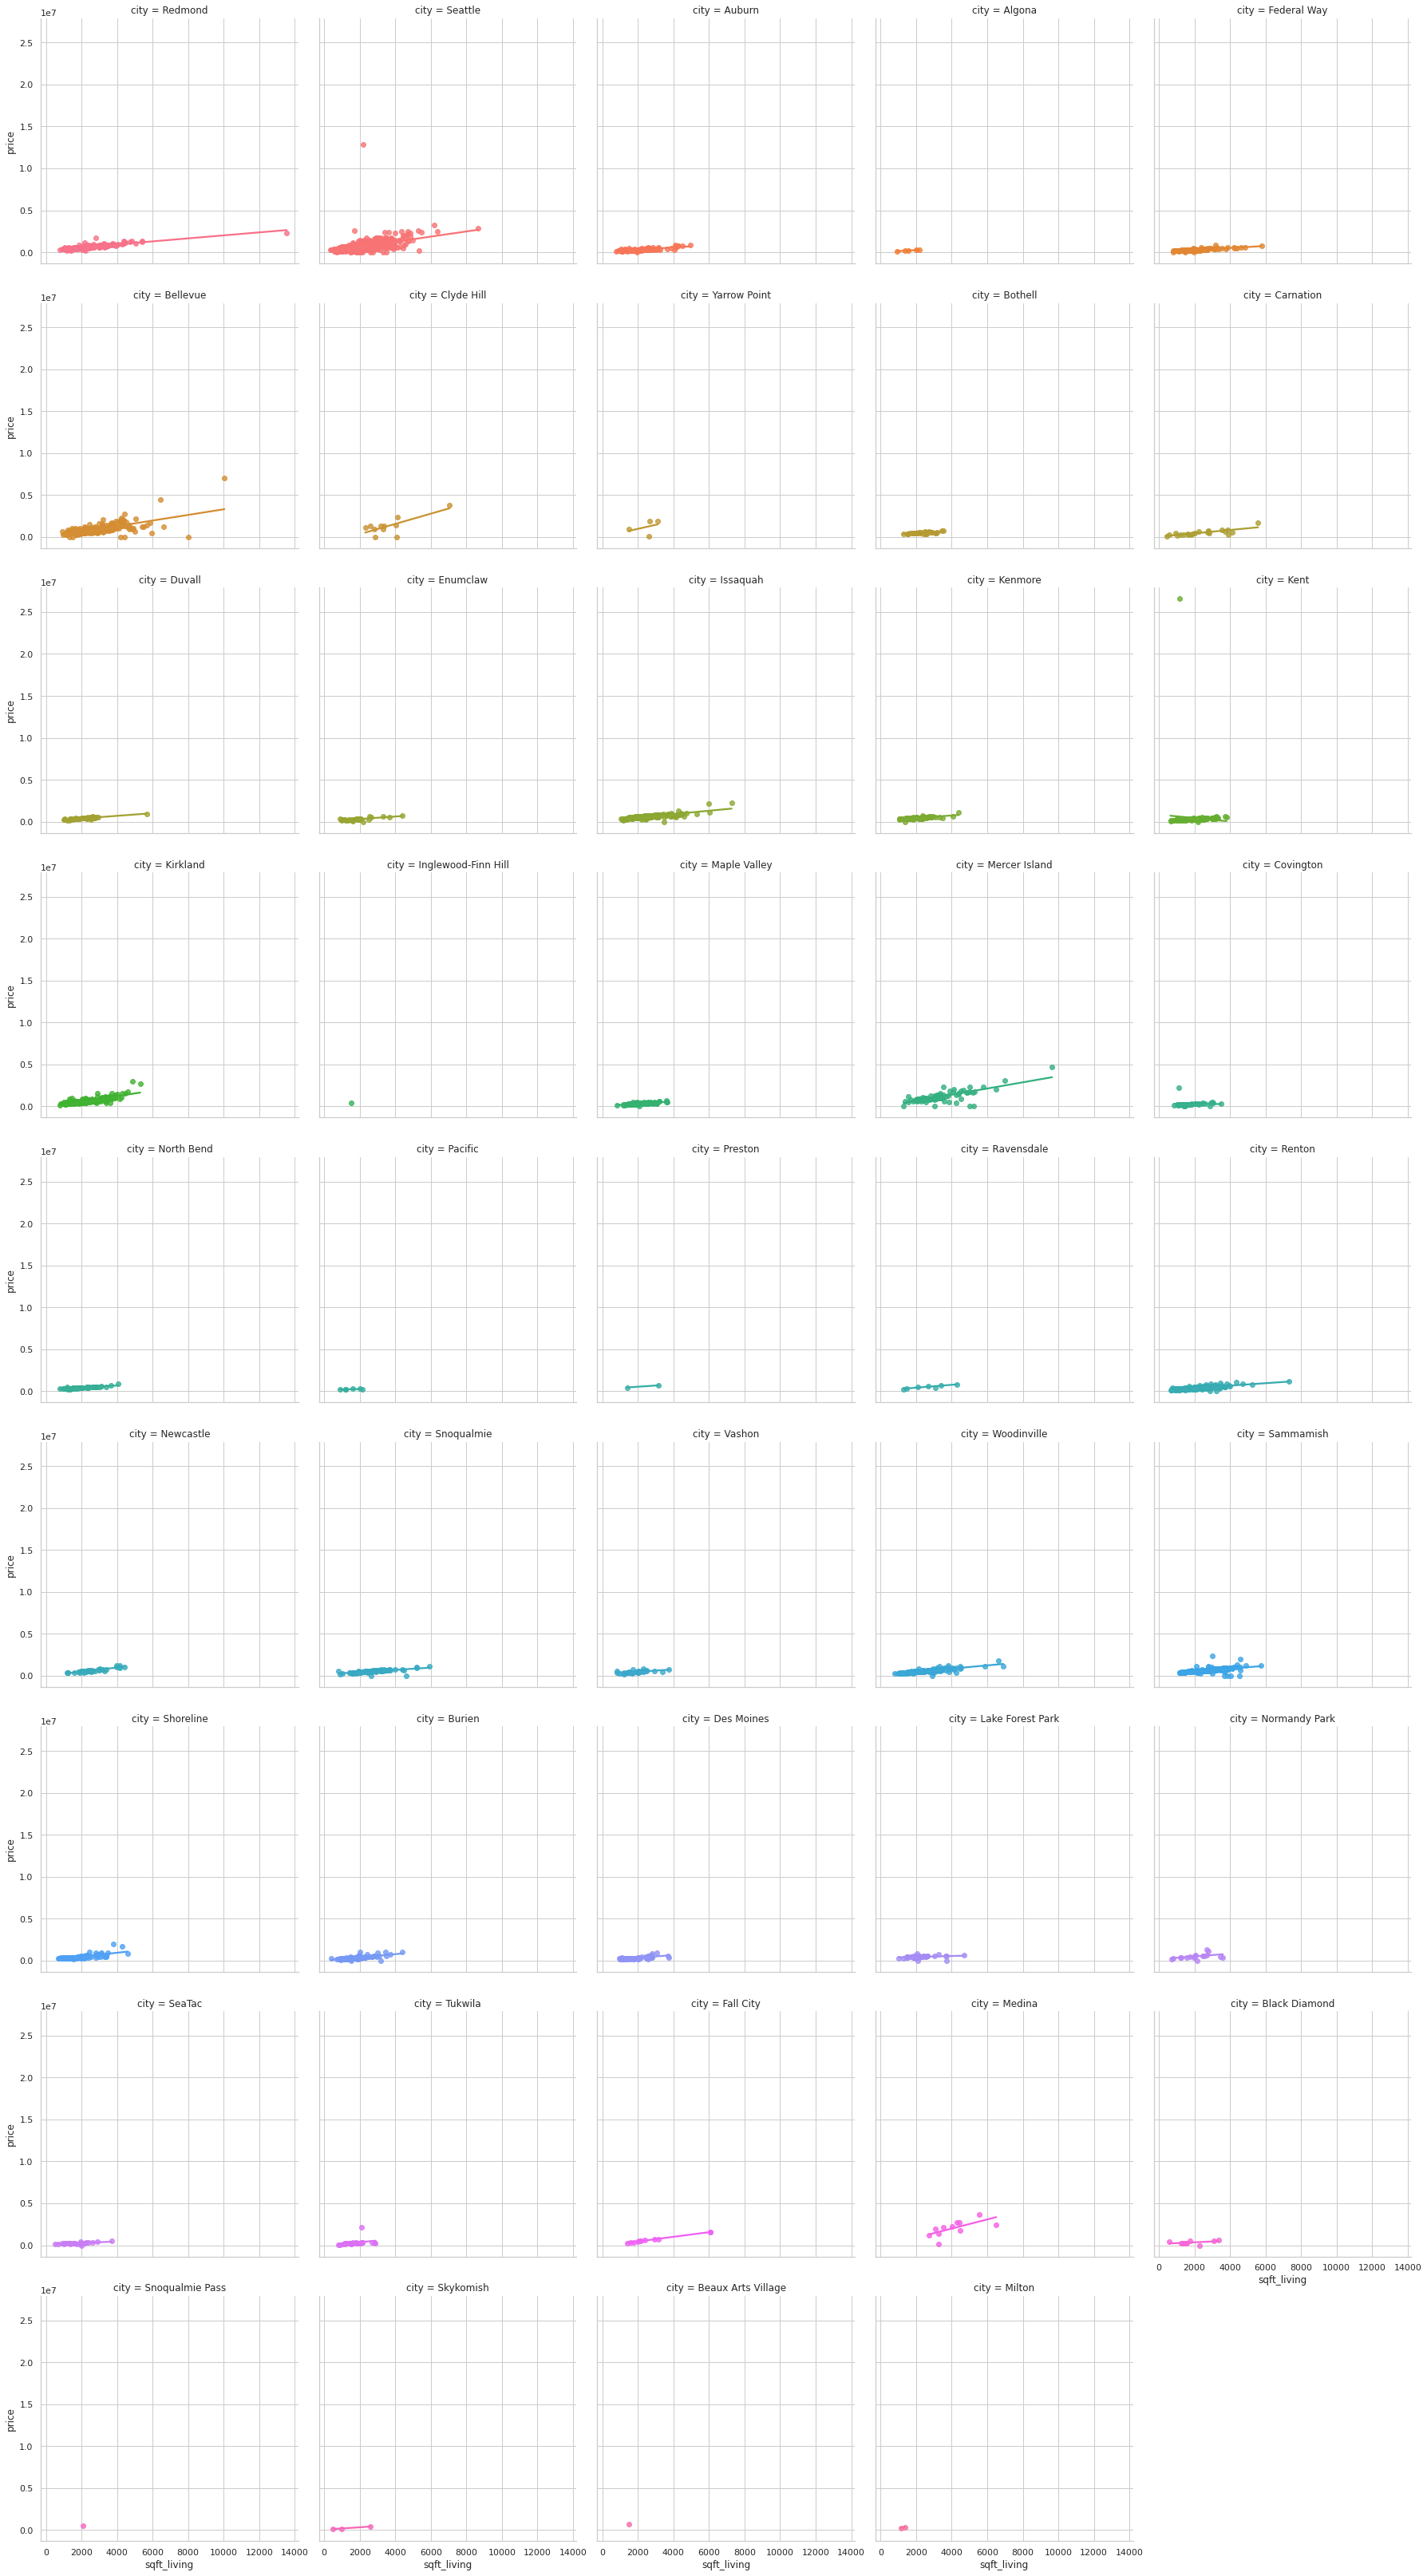

In [366]:
sns.set_style('whitegrid') 
sns_plot = sns.lmplot(data = df_house_price, x = 'sqft_living', y = 'price',ci=False, hue = 'city',col = 'city',height=5,col_wrap=5);
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

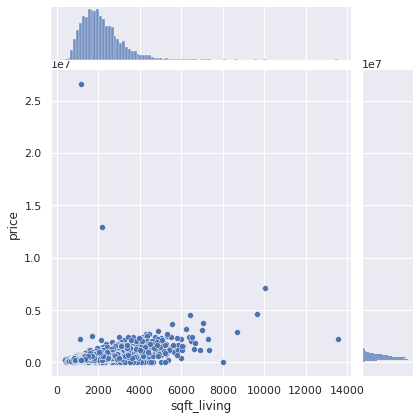

In [ ]:

sns_plot = sns.jointplot(data = df_house_price, x = 'sqft_living', y = 'price');
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

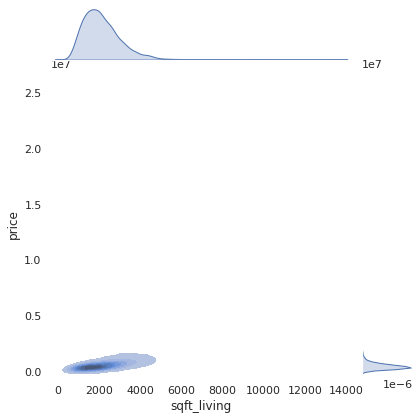

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'figure.figsize':(10,10)})
sns.jointplot(data = df_house_price, x = 'sqft_living', y = 'price', kind='kde', fill=True);

In [ ]:
# Lets filter data

In [ ]:
quantile = filtered_house_price_df["price"].quantile(0.75)
house_data_final = filtered_house_price_df[(filtered_house_price_df["price"] < quantile)]
filtered_house_price_df.shape

(3683, 18)

In [ ]:
redmond_prices = house_data_final[house_data_final['city']=='Redmond']['price']
seattle_prices = house_data_final[house_data_final['city']=='Seattle']['price']
bellevue_prices = house_data_final[house_data_final['city']=='Bellevue']['price']
kent_prices = house_data_final[house_data_final['city']=='Kent']['price']
auburn_prices = house_data_final[house_data_final['city']=='Auburn']['price']
kirkland_prices = house_data_final[house_data_final['city']=='Kirkland']['price']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

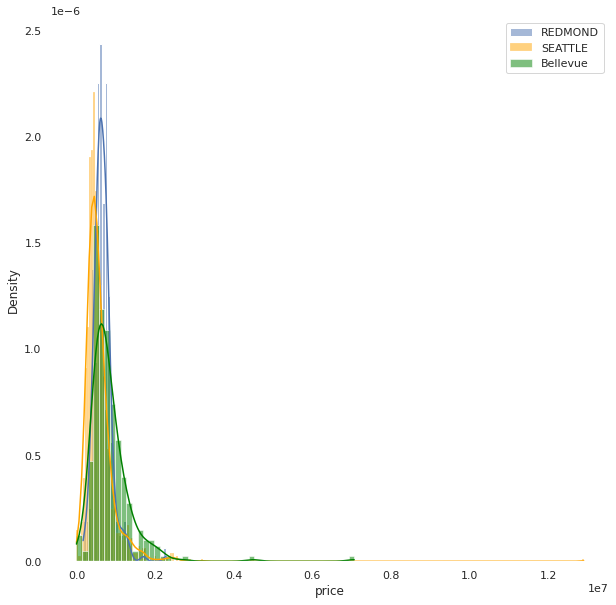

In [367]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'figure.figsize':(10,10)})
sns.histplot(redmond_prices,  kde=True, stat='density', label='REDMOND', ec='w');
sns.histplot(seattle_prices, kde=True,  stat='density', label='SEATTLE', color='orange', ec='w');
sns_plot = sns.histplot(bellevue_prices, kde=True,  stat='density', label='Bellevue', color='green', ec='w');
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

plt.legend();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

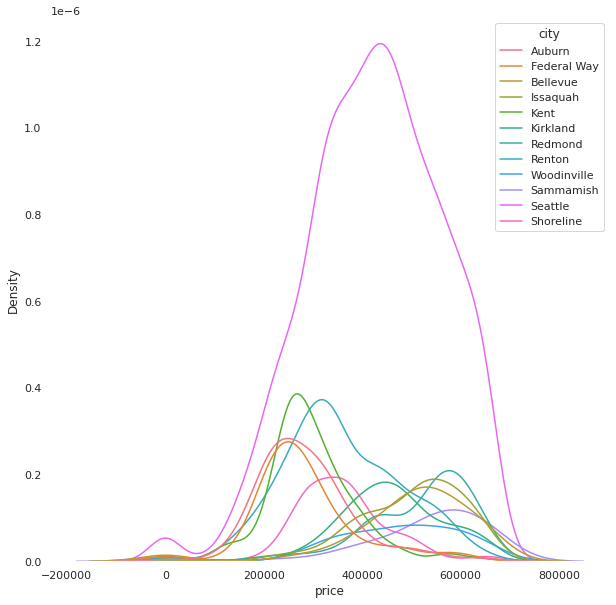

In [368]:

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'figure.figsize':(10,10)})
sns_plot = sns.kdeplot(data = house_data_final,x ='price', hue ='city' )
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

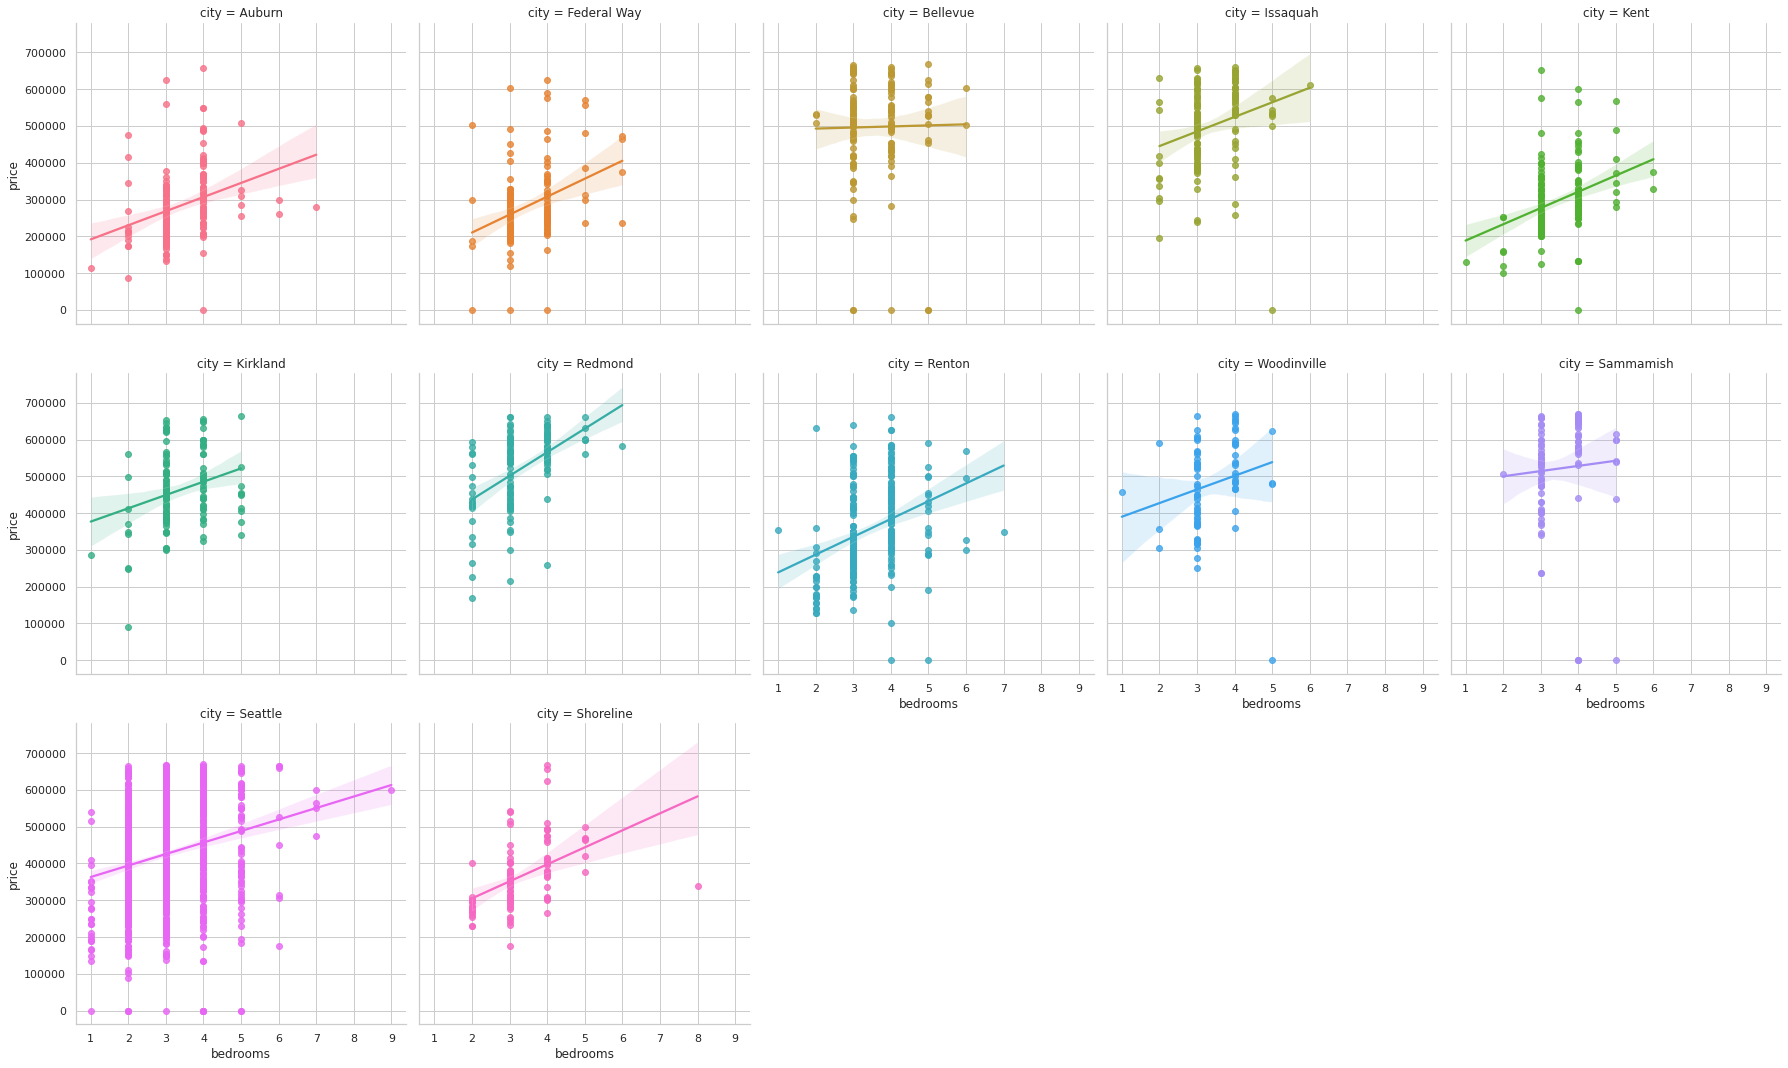

In [369]:
#Price variation with  numer of bedrooms in different cities
sns.set_style('whitegrid') 
sns_plot = sns.lmplot(x ='bedrooms', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

In [ ]:
# num bath rooms



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

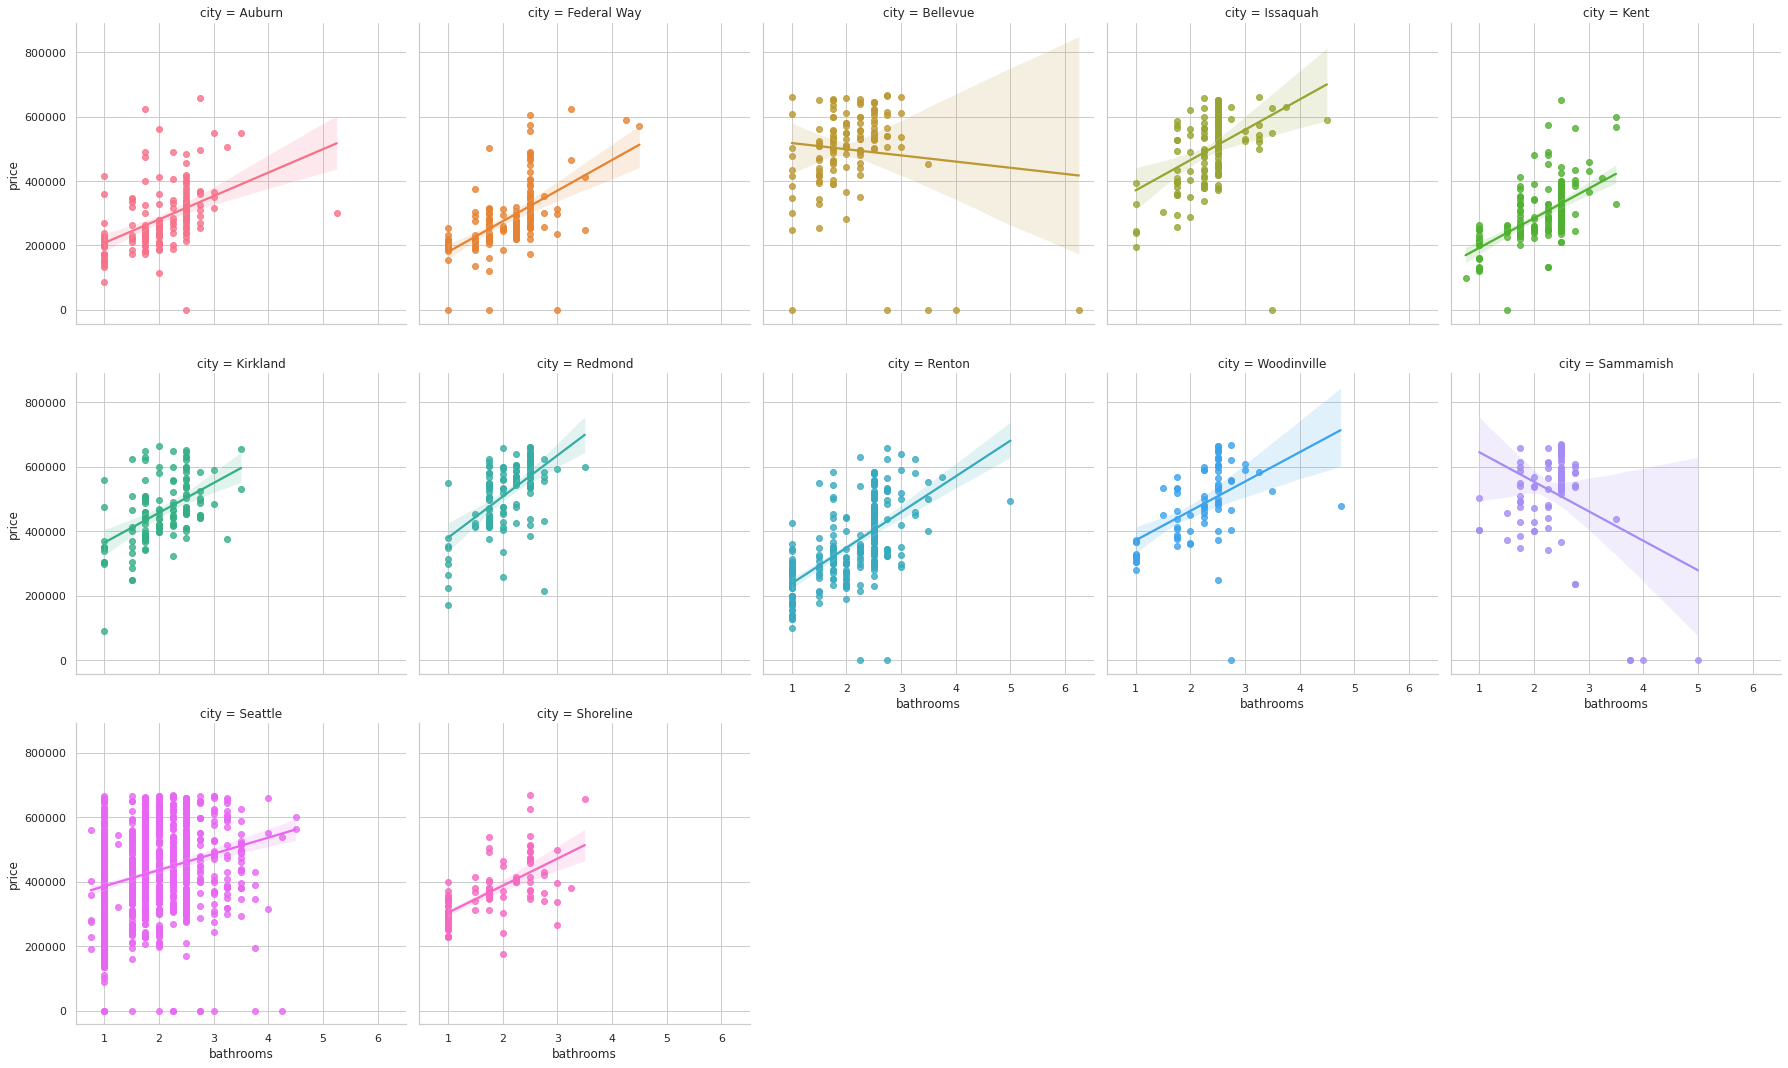

In [370]:
sns.set_style('whitegrid') 
sns_plot = sns.lmplot(x ='bathrooms', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

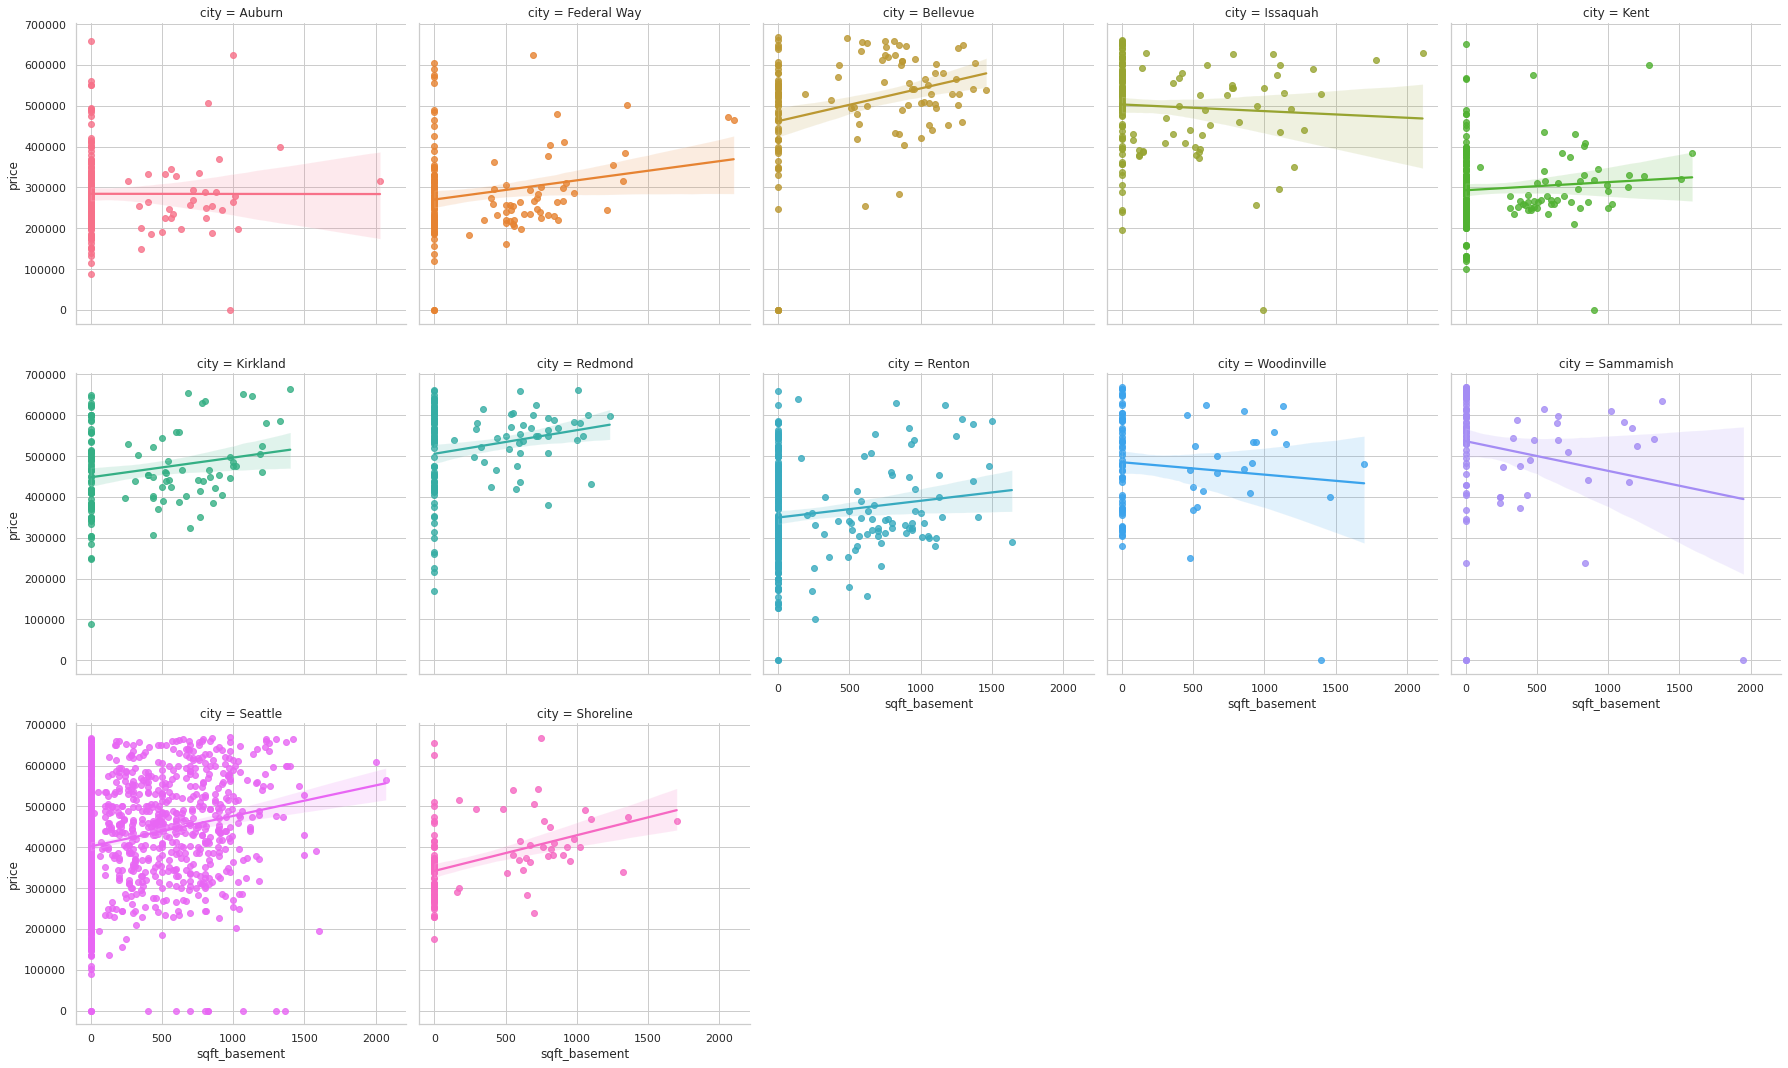

In [371]:
#Area OF BASEMENT

sns.set_style('whitegrid') 
sns_plot = sns.lmplot(x ='sqft_basement', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5)
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

In [ ]:
#Area of living Room

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

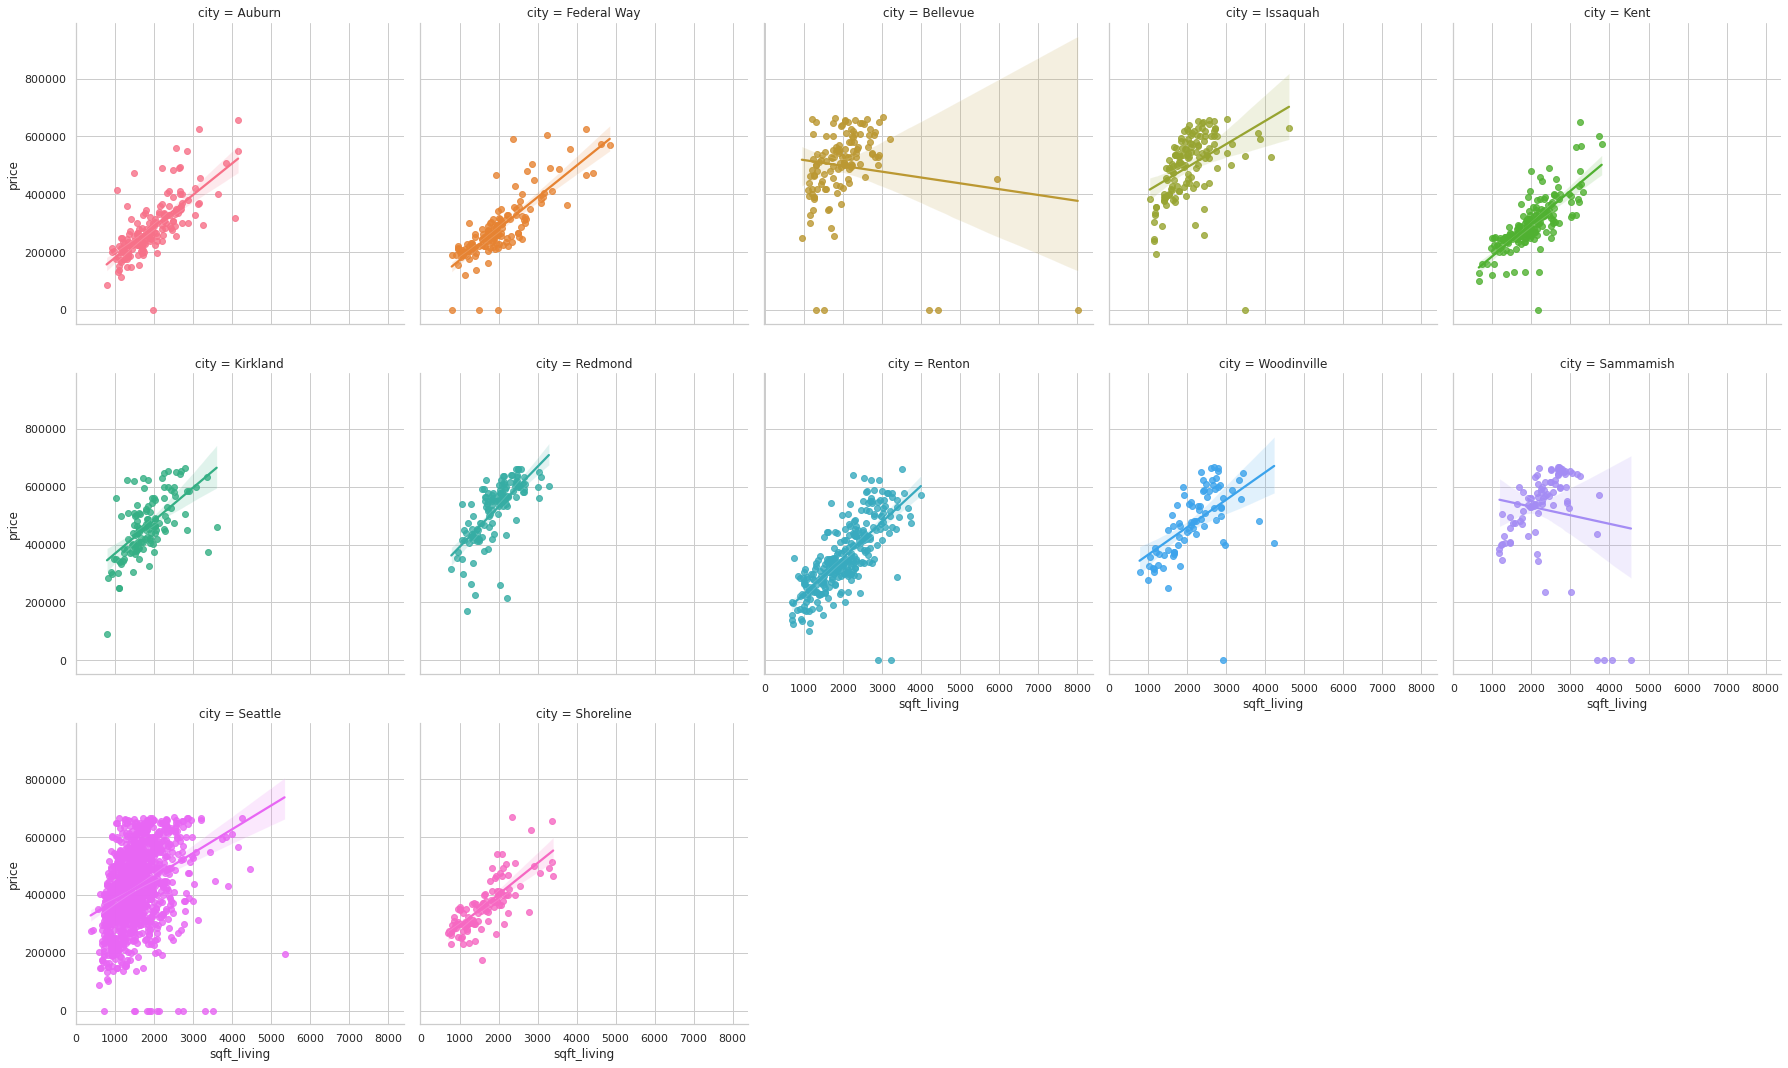

In [372]:
sns.set_style('whitegrid') 
sns_plot = sns.lmplot(x ='sqft_living', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

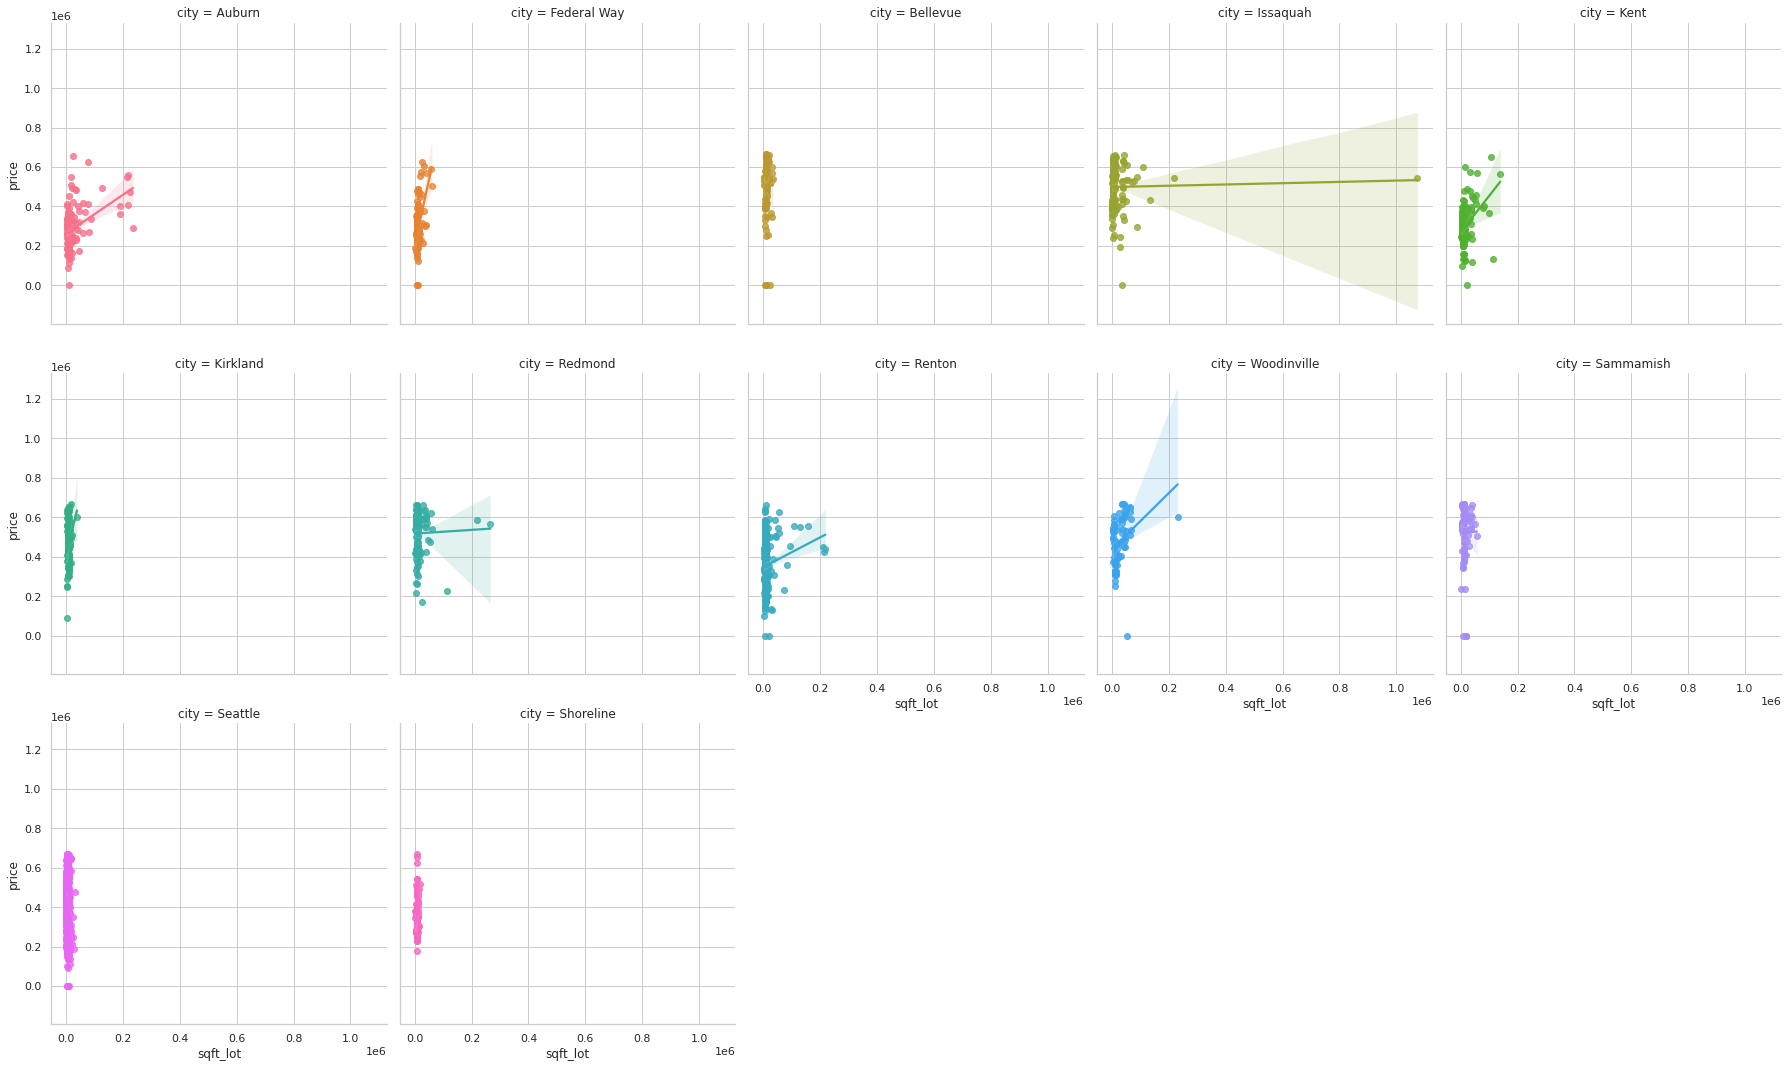

In [373]:
#Area of floor
sns.set_style('whitegrid') 
sns_plot = sns.lmplot(x ='sqft_lot', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5)
sns_plot.figure.savefig("output.pdf")
files.download("output.pdf") 

In [ ]:
# Saving the preprocessed Data back to big Query

In [ ]:
for dataset in client.list_datasets():
  print(dataset.dataset_id)

house_price


In [ ]:
output_dataset_id = 'house_price'

output_table_id = 'preprocessed_data' 

replace_or_append_output = 'replace' 


project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))

Dataset datamining-364220.house_price exists



In [ ]:
job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Use client functionality to load BigQuery table from Pandas data frame
client.load_table_from_dataframe(
 dataframe = house_data_final,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning: Unable to determine type of column 'street'.
  warnings.warn(u"Unable to determine type of column '{}'.".format(column))


Write to bigquery dataset (replace) to datamining-364220.house_price.preprocessed_data



In [ ]:
#access our own dataset
sql = """
SELECT
    *
FROM
    `datamining-364220.house_price.preprocessed_data`
"""
house_price_query = client.query(sql)
house_price_df=house_price_query.to_dataframe()
house_price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,__index_level_0__
0,2014-06-25 00:00:00+00:00,280000.0,7.0,2.50,1940,5458,2.0,0,0,3,1940,0,1994,0,12307 SE 315th Pl,Auburn,WA 98092,USA,1744
1,2014-07-03 00:00:00+00:00,340000.0,8.0,2.75,2790,6695,1.0,0,0,3,1470,1320,1977,2004,17512 Corliss Ave N,Shoreline,WA 98133,USA,2283
2,2014-06-23 00:00:00+00:00,350000.0,7.0,3.00,2800,9569,1.0,0,2,3,1400,1400,1963,2008,2023 Harrington Pl NE,Renton,WA 98056,USA,2381
3,2014-05-15 00:00:00+00:00,475000.0,7.0,3.50,2870,29699,1.0,0,0,3,1520,1350,1961,2004,11738 1st Ave NE,Seattle,WA 98125,USA,2751
4,2014-05-13 00:00:00+00:00,550000.0,7.0,4.00,3440,8100,2.0,0,0,3,3440,0,1970,2014,718 N 95th St,Seattle,WA 98103,USA,2832
